In [1049]:
#Dependencies
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import string
import scipy.stats as stats
import seaborn as sns

In [1050]:
file_one = "SFA Craft Demo and Case Study - Huffman.csv"
SFA_df = pd.read_csv(file_one)
SFA_df.head()

,ID,BAD,opendate,AreaCode,EAScore,IdentityRank,DeviceBrowserType,IpAddressLocCity,IpAddressLocCountry,IsValid,IsConnected,Personal,Reputation Level,ReceivingMail,Type,Volume Score,Result Number,EmailDays
0,134457,1,9/3/15,973,NaN,425.0,TRIDENT,NaN,UNITED STATES,True,True,True,1,True,L,1,2,95
1,6360592,0,9/28/15,310,930.0,652.0,TRIDENT,AUSTIN,UNITED STATES,True,True,True,1,True,F,1,1,116
2,462987,0,9/2/15,502,704.0,683.0,CHROME,LOUISVILLE,UNITED STATES,True,True,True,1,NaN,M,1,1,116
3,309372,0,10/1/15,518,113.0,477.0,FIREFOX,SCHENECTADY,UNITED STATES,True,True,True,1,NaN,L,1,1,1513
4,397009,1,7/12/15,713,NaN,587.0,FIREFOX,LOS ANGELES,UNITED STATES,True,NaN,True,1,NaN,N,1,1,0


In [1051]:
total_records = SFA_df['BAD'].count()
bad = SFA_df[SFA_df['BAD']==1].count()
bad = bad['BAD']
OK = SFA_df[SFA_df['BAD']==0].count()
OK = OK['BAD']
percents = ((OK/total_records)*100, (bad/total_records)*100)
labels = ['OK', 'BAD']
colors = ['lightgreen', 'red']
OK

1433

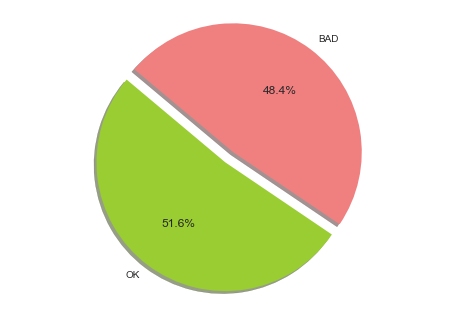

In [1052]:
labels = 'OK', 'BAD'
colors = ['yellowgreen', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(percents, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [1053]:
SFA_df.head()

,ID,BAD,opendate,AreaCode,EAScore,IdentityRank,DeviceBrowserType,IpAddressLocCity,IpAddressLocCountry,IsValid,IsConnected,Personal,Reputation Level,ReceivingMail,Type,Volume Score,Result Number,EmailDays
0,134457,1,9/3/15,973,NaN,425.0,TRIDENT,NaN,UNITED STATES,True,True,True,1,True,L,1,2,95
1,6360592,0,9/28/15,310,930.0,652.0,TRIDENT,AUSTIN,UNITED STATES,True,True,True,1,True,F,1,1,116
2,462987,0,9/2/15,502,704.0,683.0,CHROME,LOUISVILLE,UNITED STATES,True,True,True,1,NaN,M,1,1,116
3,309372,0,10/1/15,518,113.0,477.0,FIREFOX,SCHENECTADY,UNITED STATES,True,True,True,1,NaN,L,1,1,1513
4,397009,1,7/12/15,713,NaN,587.0,FIREFOX,LOS ANGELES,UNITED STATES,True,NaN,True,1,NaN,N,1,1,0


In [1054]:
IsValid_True = SFA_df[SFA_df['IsValid']==True]
Is_Valid_False = SFA_df[SFA_df['IsValid']==False]

In [1055]:
IV = SFA_df[['BAD','IsValid']]
#IV = IV.groupby('BAD', as_index = False).count()

IVT = IV[IV['IsValid'] == True]
IVT = IVT.groupby('BAD', as_index = False)['IsValid'].count()

IVF = IV[IV['IsValid'] == False]
IVF = IVF.groupby('BAD', as_index = False)['IsValid'].count()
  

In [1056]:
IVT_BAD = (IVT.loc[IVT['BAD'] == 1, 'IsValid']).sum()
IVF_BAD = (IVF.loc[IVF['BAD'] == 1, 'IsValid']).sum()

IVT_OK = (IVT.loc[IVT['BAD'] == 0, 'IsValid']).sum()
IVF_OK = (IVF.loc[IVF['BAD'] == 0, 'IsValid']).sum()

# IVT = IVT_BAD[0] + IVT_OK[0]
# IVT_BAD = IVT_BAD[0]/IVT
# IVT_OK = IVT_OK[0]/IVT

# IVF = IVF_BAD[0]
# IVF_BAD = IVF_BAD[0]/IVF
# IVF_OK = 0

BAD = (IVT_BAD, IVF_BAD)
OK = (IVT_OK, 0)
BAD



(1341, 1)

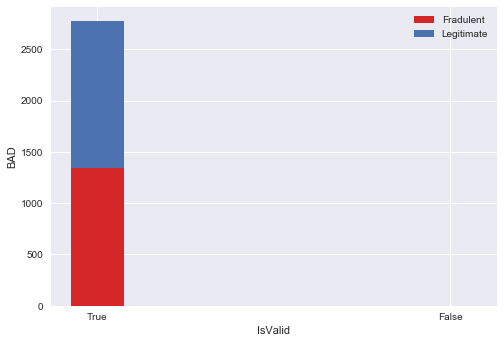

In [1057]:
N = 2
ind = np.arange(N)
width = 0.15

# IV_BAD = (1341, 1)
# IV_OK = (1433, 0)

p1 = plt.bar(ind, BAD, width, color='#d62728', label = 'Fradulent')
p2 = plt.bar(ind, OK, width, label = 'Legitimate', bottom = BAD)

plt.ylabel('BAD')
plt.xlabel('IsValid')
plt.xticks(ind, ('True', 'False'))
plt.legend(loc="upper right")
plt.show()



In [1058]:
IC = SFA_df[['BAD','IsConnected']]
#IV = IV.groupby('BAD', as_index = False).count()

ICT = IC[IC['IsConnected']==True]
ICF = IC[IC['IsConnected']==False]
IC['IsConnected'].fillna(0, inplace = True)
ICNaN = IC[IC['IsConnected']==0]


#IsConnected_True

/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [1059]:
ICT_BAD = (ICT.loc[ICT['BAD'] == 1, 'IsConnected']).count()
ICF_BAD = (ICF.loc[ICF['BAD'] == 1, 'IsConnected']).count()
ICNaN_BAD = (ICNaN.loc[ICNaN['BAD'] == 1, 'IsConnected']).count()

ICT_OK = (ICT.loc[ICT['BAD'] == 0, 'IsConnected']).count()
ICF_OK = (ICF.loc[ICF['BAD'] == 0, 'IsConnected']).count()
ICNaN_OK = (ICNaN.loc[ICNaN['BAD'] == 0, 'IsConnected']).count()

BAD = (ICT_BAD, ICF_BAD, ICNaN_BAD)
OK = (ICT_OK, ICF_OK, ICNaN_OK)
BAD

(941, 1, 401)

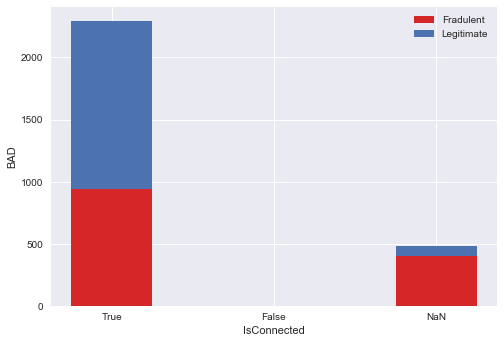

In [1060]:
N = 3
ind = np.arange(N)
width = 0.5

# IV_BAD = (1341, 1)
# IV_OK = (1433, 0)

p1 = plt.bar(ind, BAD, width, color='#d62728', label = 'Fradulent')
p2 = plt.bar(ind, OK, width, label = 'Legitimate', bottom = BAD)

plt.ylabel('BAD')
plt.xlabel('IsConnected')
plt.xticks(ind, ('True', 'False', 'NaN'))
plt.legend(loc="upper right")
plt.show()

In [1061]:
IP = SFA_df[['BAD','Personal']]
#IV = IV.groupby('BAD', as_index = False).count()

IPT = IP[IP['Personal']==True]
IPF = IP[IP['Personal']==False]
IP['Personal'].fillna(0, inplace = True)
IPNaN = IP[IP['Personal']==0]

/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [1062]:
IPT_BAD = (IPT.loc[IPT['BAD'] == 1, 'Personal']).count()
IPF_BAD = (IPF.loc[IPF['BAD'] == 1, 'Personal']).count()
IPNaN_BAD = (IPNaN.loc[IPNaN['BAD'] == 1, 'Personal']).count()

IPT_OK = (IPT.loc[IPT['BAD'] == 0, 'Personal']).count()
IPF_OK = (IPF.loc[IPF['BAD'] == 0, 'Personal']).count()
IPNaN_OK = (IPNaN.loc[IPNaN['BAD'] == 0, 'Personal']).count()

# IPT_Total = ICT_BAD + ICT_OK
# IPF_Total = ICF_BAD + ICF_OK
# IPN_Total = ICNaN_BAD + ICNaN_OK

IPT_BAD = IPT_BAD
IPF_BAD = IPF_BAD
IPNaN_BAD = IPNaN_BAD

IPT_OK = IPT_OK
IPF_OK = IPF_OK
IPNaN_OK = IPNaN_OK

BAD = (IPT_BAD, IPF_BAD, IPNaN_BAD)
OK = (IPT_OK, IPF_OK, IPNaN_OK)

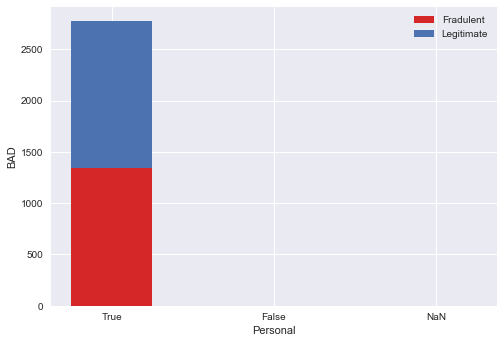

In [1063]:
N = 3
ind = np.arange(N)
width = 0.5

# IV_BAD = (1341, 1)
# IV_OK = (1433, 0)

p1 = plt.bar(ind, BAD, width, color='#d62728', label = 'Fradulent')
p2 = plt.bar(ind, OK, width, label = 'Legitimate', bottom = BAD)

plt.ylabel('BAD')
plt.xlabel('Personal')
plt.xticks(ind, ('True', 'False', 'NaN'))
plt.legend(loc="upper right")
plt.show()

In [1064]:
IR = SFA_df[['BAD','Reputation Level']]
#IV = IV.groupby('BAD', as_index = False).count()

IR1 = IR[IR['Reputation Level']==1]
IR2 = IR[IR['Reputation Level']==2]
IR3 = IR[IR['Reputation Level']==3]

In [1065]:
IR1_BAD = (IR1.loc[IR1['BAD'] == 1, 'Reputation Level']).count()
IR2_BAD = (IR2.loc[IR2['BAD'] == 1, 'Reputation Level']).count()
IR3_BAD = (IR3.loc[IR3['BAD'] == 1, 'Reputation Level']).count()

IR1_OK = (IR1.loc[IR1['BAD'] == 0, 'Reputation Level']).count()
IR2_OK = (IR2.loc[IR2['BAD'] == 0, 'Reputation Level']).count()
IR3_OK = (IR3.loc[IR3['BAD'] == 0, 'Reputation Level']).count()

# IPT_Total = ICT_BAD + ICT_OK
# IPF_Total = ICF_BAD + ICF_OK
# IPN_Total = ICNaN_BAD + ICNaN_OK

# IPT_BAD = IPT_BAD
# IPF_BAD = IPF_BAD
# IPNaN_BAD = IPNaN_BAD

# IPT_OK = IPT_OK
# IPF_OK = IPF_OK
# IPNaN_OK = IPNaN_OK

BAD = (IR1_BAD, IR2_BAD, IR3_BAD)
OK = (IR1_OK, IR2_OK, IR3_OK)

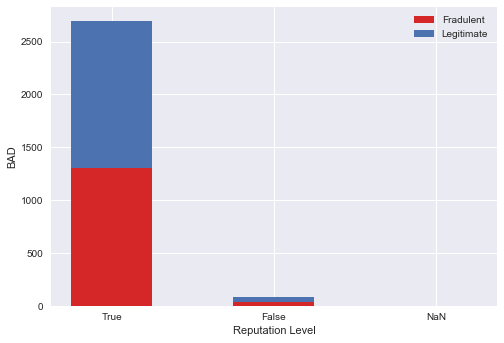

In [1066]:
N = 3
ind = np.arange(N)
width = 0.5

# IV_BAD = (1341, 1)
# IV_OK = (1433, 0)

p1 = plt.bar(ind, BAD, width, color='#d62728', label = 'Fradulent')
p2 = plt.bar(ind, OK, width, label = 'Legitimate', bottom = BAD)

plt.ylabel('BAD')
plt.xlabel('Reputation Level')
plt.xticks(ind, ('True', 'False', 'NaN'))
plt.legend(loc="upper right")
plt.show()

In [1067]:
IT = SFA_df[['BAD','Type']]
#IV = IV.groupby('BAD', as_index = False).count()

IT0 = IT[IT['Type']=='0']
ITF = IT[IT['Type']=='F']
ITL = IT[IT['Type']=='L']
ITM = IT[IT['Type']=='M']
ITN = IT[IT['Type']=='N']
ITT = IT[IT['Type']=='T']

In [1068]:
IT0_BAD = (IT0.loc[IT0['BAD'] == 1, 'Type']).count()
ITF_BAD = (ITF.loc[ITF['BAD'] == 1, 'Type']).count()
ITL_BAD = (ITL.loc[ITL['BAD'] == 1, 'Type']).count()
ITM_BAD = (ITM.loc[ITM['BAD'] == 1, 'Type']).count()
ITN_BAD = (ITN.loc[ITN['BAD'] == 1, 'Type']).count()
ITT_BAD = (ITT.loc[ITT['BAD'] == 1, 'Type']).count()

IT0_OK = (IT0.loc[IT0['BAD'] == 0, 'Type']).count()
ITF_OK = (ITF.loc[ITF['BAD'] == 0, 'Type']).count()
ITL_OK = (ITL.loc[ITL['BAD'] == 0, 'Type']).count()
ITM_OK = (ITM.loc[ITM['BAD'] == 0, 'Type']).count()
ITN_OK = (ITN.loc[ITN['BAD'] == 0, 'Type']).count()
ITT_OK = (ITT.loc[ITT['BAD'] == 0, 'Type']).count()
# IPF_Total = ICF_BAD + ICF_OK
# IPN_Total = ICNaN_BAD + ICNaN_OK

# IPT_BAD = IPT_BAD
# IPF_BAD = IPF_BAD
# IPNaN_BAD = IPNaN_BAD

# IPT_OK = IPT_OK
# IPF_OK = IPF_OK
# IPNaN_OK = IPNaN_OK

BAD = (IT0_BAD, ITF_BAD, ITL_BAD, ITM_BAD, ITN_BAD, ITT_BAD)
OK = (IT0_OK, ITF_OK, ITL_OK, ITM_OK, ITN_OK, ITT_OK)

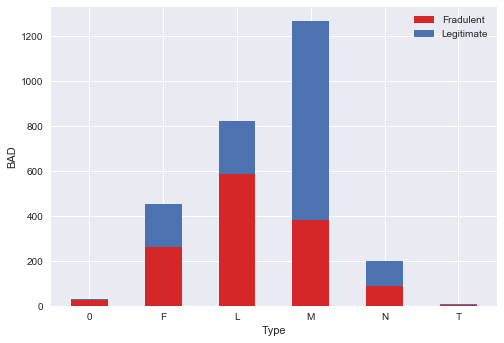

In [1069]:
N = 6
ind = np.arange(N)
width = 0.5

# IV_BAD = (1341, 1)
# IV_OK = (1433, 0)

p1 = plt.bar(ind, BAD, width, color='#d62728', label = 'Fradulent')
p2 = plt.bar(ind, OK, width, label = 'Legitimate', bottom = BAD)

plt.ylabel('BAD')
plt.xlabel('Type')
plt.xticks(ind, ('0','F', 'L', 'M', 'N', 'T'))
plt.legend(loc="upper right")
plt.show()

In [1070]:
IVS = SFA_df[['BAD','Volume Score']]
#IV = IV.groupby('BAD', as_index = False).count()

IVS1 = IVS[IVS['Volume Score']== 1]
IVS2 = IVS[IVS['Volume Score']== 2]
IVS3 = IVS[IVS['Volume Score']== 3]


In [1071]:
IVS1_BAD = (IVS1.loc[IVS1['BAD'] == 1, 'Volume Score']).count()
IVS2_BAD = (IVS2.loc[IVS2['BAD'] == 1, 'Volume Score']).count()
IVS3_BAD = (IVS3.loc[IVS3['BAD'] == 1, 'Volume Score']).count()

IVS1_OK = (IVS1.loc[IVS1['BAD'] == 0, 'Volume Score']).count()
IVS2_OK = (IVS2.loc[IVS2['BAD'] == 0, 'Volume Score']).count()
IVS3_OK = (IVS3.loc[IVS3['BAD'] == 0, 'Volume Score']).count()

BAD = (IVS1_BAD, IVS2_BAD, IVS3_BAD)
OK = (IVS1_OK, IVS2_OK, IVS3_OK)
OK

(1232, 200, 1)

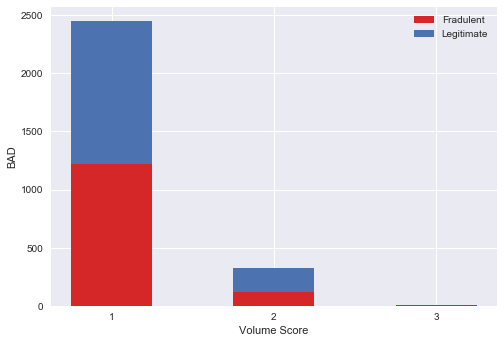

In [1072]:
N = 3
ind = np.arange(N)
width = 0.5

# IV_BAD = (1341, 1)
# IV_OK = (1433, 0)

p1 = plt.bar(ind, BAD, width, color='#d62728', label = 'Fradulent')
p2 = plt.bar(ind, OK, width, label = 'Legitimate', bottom = BAD)

plt.ylabel('BAD')
plt.xlabel('Volume Score')
plt.xticks(ind, ('1', '2', '3'))
plt.legend(loc="upper right")
plt.show()

In [1073]:
RN = SFA_df[['BAD','Result Number']]
#IV = IV.groupby('BAD', as_index = False).count()

RN1 = RN[RN['Result Number']== 1]
RN2 = RN[RN['Result Number']== 2]
RN3 = RN[RN['Result Number']== 3]
RN4 = RN[RN['Result Number']== 4]
RN5 = RN[RN['Result Number']== 5]
RN6 = RN[RN['Result Number']== 6]
RN7 = RN[RN['Result Number']== 7]
RN8 = RN[RN['Result Number']== 8]
RN9 = RN[RN['Result Number']== 9]
RN10 = RN[RN['Result Number']== 10]
RN_10 = RN[RN['Result Number'] > 10]
RN1.head()



,BAD,Result Number
1,0,1
2,0,1
3,0,1
4,1,1
5,1,1


In [1074]:
RN1_BAD = (RN1.loc[RN1['BAD'] == 1, 'Result Number']).count()
RN2_BAD = (RN2.loc[RN2['BAD'] == 1, 'Result Number']).count()
RN3_BAD = (RN3.loc[RN3['BAD'] == 1, 'Result Number']).count()
RN4_BAD = (RN4.loc[RN4['BAD'] == 1, 'Result Number']).count()
RN5_BAD = (RN5.loc[RN5['BAD'] == 1, 'Result Number']).count()
RN6_BAD = (RN6.loc[RN6['BAD'] == 1, 'Result Number']).count()
RN7_BAD = (RN7.loc[RN7['BAD'] == 1, 'Result Number']).count()
RN8_BAD = (RN8.loc[RN8['BAD'] == 1, 'Result Number']).count()
RN9_BAD = (RN9.loc[RN9['BAD'] == 1, 'Result Number']).count()
RN10_BAD = (RN10.loc[RN10['BAD'] == 1, 'Result Number']).count()
RN_10_BAD = (RN_10.loc[RN_10['BAD'] == 1, 'Result Number']).count()

RN1_OK = (RN1.loc[RN1['BAD'] == 0, 'Result Number']).count()
RN2_OK = (RN2.loc[RN2['BAD'] == 0, 'Result Number']).count()
RN3_OK = (RN3.loc[RN3['BAD'] == 0, 'Result Number']).count()
RN4_OK = (RN4.loc[RN4['BAD'] == 0, 'Result Number']).count()
RN5_OK = (RN5.loc[RN5['BAD'] == 0, 'Result Number']).count()
RN6_OK = (RN6.loc[RN6['BAD'] == 0, 'Result Number']).count()
RN7_OK = (RN7.loc[RN7['BAD'] == 0, 'Result Number']).count()
RN8_OK = (RN8.loc[RN8['BAD'] == 0, 'Result Number']).count()
RN9_OK = (RN9.loc[RN9['BAD'] == 0, 'Result Number']).count()
RN10_OK = (RN10.loc[RN10['BAD'] == 0, 'Result Number']).count()
RN_10_OK = (RN_10.loc[RN_10['BAD'] == 0, 'Result Number']).count()

BAD = (RN1_BAD, RN2_BAD, RN3_BAD, RN4_BAD, RN5_BAD, RN6_BAD, RN7_BAD, RN8_BAD, RN9_BAD, RN10_BAD, RN_10_BAD)
OK = (RN1_OK, RN2_OK, RN3_OK, RN4_OK, RN5_OK, RN6_OK, RN7_OK, RN8_OK, RN9_OK, RN10_OK, RN_10_OK)


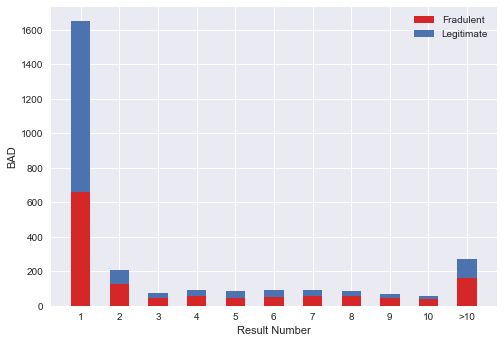

In [1075]:
N = 11
ind = np.arange(N)
width = 0.5

# IV_BAD = (1341, 1)
# IV_OK = (1433, 0)

p1 = plt.bar(ind, BAD, width, color='#d62728', label = 'Fradulent')
p2 = plt.bar(ind, OK, width, label = 'Legitimate', bottom = BAD)

plt.ylabel('BAD')
plt.xlabel('Result Number')
plt.xticks(ind, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '>10'))
plt.legend(loc="upper right")
plt.show()